In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
import gc
import os
import pickle
import lightgbm as lgb
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold, KFold
from collections import defaultdict
import joblib
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [2]:
train1=pd.read_csv('/input/xunfei-company-health/企业经营健康评估挑战赛公开数据/train.csv')
test=pd.read_csv('/input/xunfei-company-health/企业经营健康评估挑战赛公开数据/test.csv')

In [3]:
train1
#heat——map.PCA,log

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x85,x86,x87,x88,x89,x90,x91,x92,x93,target
0,0,0.044565,0.565232,0.026807,0.277510,0.841622,0.606100,0.623907,0.006651,0.819966,...,0.303745,0.809452,0.797538,0.998988,0.605957,0.606102,0.559521,0.573769,0.505749,0
1,1,0.033669,0.554498,0.026342,0.279219,0.840480,0.603612,0.623799,0.004209,0.800841,...,0.303443,0.809331,0.797389,0.999008,0.603648,0.603615,0.535289,0.542889,0.482052,0
2,2,0.025882,0.565383,0.026841,0.281413,0.842148,0.606684,0.624912,0.001448,0.819439,...,0.303508,0.809424,0.797533,0.999097,0.606688,0.606688,0.572793,0.577020,0.527860,0
3,3,0.017006,0.564639,0.026708,0.312728,0.838685,0.605290,0.623656,0.000684,0.799552,...,0.303504,0.809318,0.797394,0.998982,0.605293,0.605293,0.532640,0.546951,0.484103,0
4,4,0.021400,0.562448,0.026505,0.283815,0.839210,0.610309,0.622768,0.002616,0.789094,...,0.303132,0.809211,0.797265,0.999053,0.610321,0.610308,0.527142,0.525711,0.472661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,0.102314,0.566328,0.027151,0.279364,0.841161,0.610088,0.622934,0.072789,0.817217,...,0.303529,0.809471,0.797541,0.999093,0.610094,0.610089,0.601242,0.575495,0.538123,0
59996,59996,0.029860,0.565454,0.026862,0.282874,0.843580,0.601806,0.623090,0.008930,0.838433,...,0.303523,0.809419,0.797509,0.999069,0.601721,0.601808,0.607575,0.621555,0.556838,0
59997,59997,0.052078,0.564987,0.026808,0.277030,0.840598,0.611670,0.623754,0.000857,0.805179,...,0.303526,0.809358,0.797452,0.999020,0.611671,0.611671,0.540747,0.549321,0.490580,0
59998,59998,0.030184,0.565577,0.026596,0.279630,0.843191,0.616189,0.623706,0.000872,0.835900,...,0.303553,0.809475,0.797594,0.999126,0.616189,0.616192,0.597242,0.607896,0.551061,0


In [4]:
train1['x8'].max()

9820000000.0

In [5]:
train1['x19'].max()

0.814675685289632

In [6]:
train1['x10'].max()

1.0

In [7]:
test['x10'].max()

0.33426540931832

In [10]:
train1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,60000.0,29999.500000,17320.652413,0.000000,14999.750000,29999.500000,44999.250000,59999.00000
x1,60000.0,0.044228,0.045125,0.008500,0.022683,0.031852,0.049371,1.00000
x2,60000.0,0.565282,0.011898,0.000000,0.565031,0.565284,0.565917,1.00000
x3,60000.0,0.027955,0.015674,0.000789,0.026750,0.026814,0.026970,1.00000
x4,60000.0,0.282794,0.026986,0.000000,0.277592,0.279701,0.283147,1.00000
...,...,...,...,...,...,...,...,...
x90,60000.0,0.606301,0.014960,0.000000,0.599389,0.604799,0.612470,1.00000
x91,60000.0,0.538374,0.067620,0.000000,0.511693,0.543800,0.573154,1.00000
x92,60000.0,0.541781,0.073612,0.000000,0.516119,0.550950,0.578216,1.00000
x93,60000.0,0.490271,0.064347,0.000000,0.462724,0.493594,0.524210,0.97153


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,79999.500000,11547.149720,60000.000000,69999.750000,79999.500000,89999.250000,99999.000000
x1,40000.0,0.042476,0.032147,0.000000,0.024349,0.034452,0.049909,0.677340
x2,40000.0,0.565380,0.006548,0.319590,0.565073,0.565227,0.565487,0.736985
x3,40000.0,0.027030,0.002300,0.000000,0.026771,0.026805,0.026865,0.136677
x4,40000.0,0.281192,0.007557,0.259280,0.277357,0.279007,0.282083,0.337315
...,...,...,...,...,...,...,...,...
x89,40000.0,0.607486,0.011869,0.448342,0.600235,0.605913,0.612230,0.664502
x90,40000.0,0.607488,0.011903,0.448342,0.600176,0.605927,0.612261,0.664502
x91,40000.0,0.538800,0.069638,0.208362,0.514819,0.550284,0.577926,0.957760
x92,40000.0,0.543032,0.077748,0.132959,0.517639,0.558996,0.586144,0.947067


In [12]:
train1['target'].value_counts()

0    484431    11557Name: target, dtype: int64

In [13]:
features=[a for a in train1.columns if a not in ['target','preds','id','x18','x23','x41','x47']]

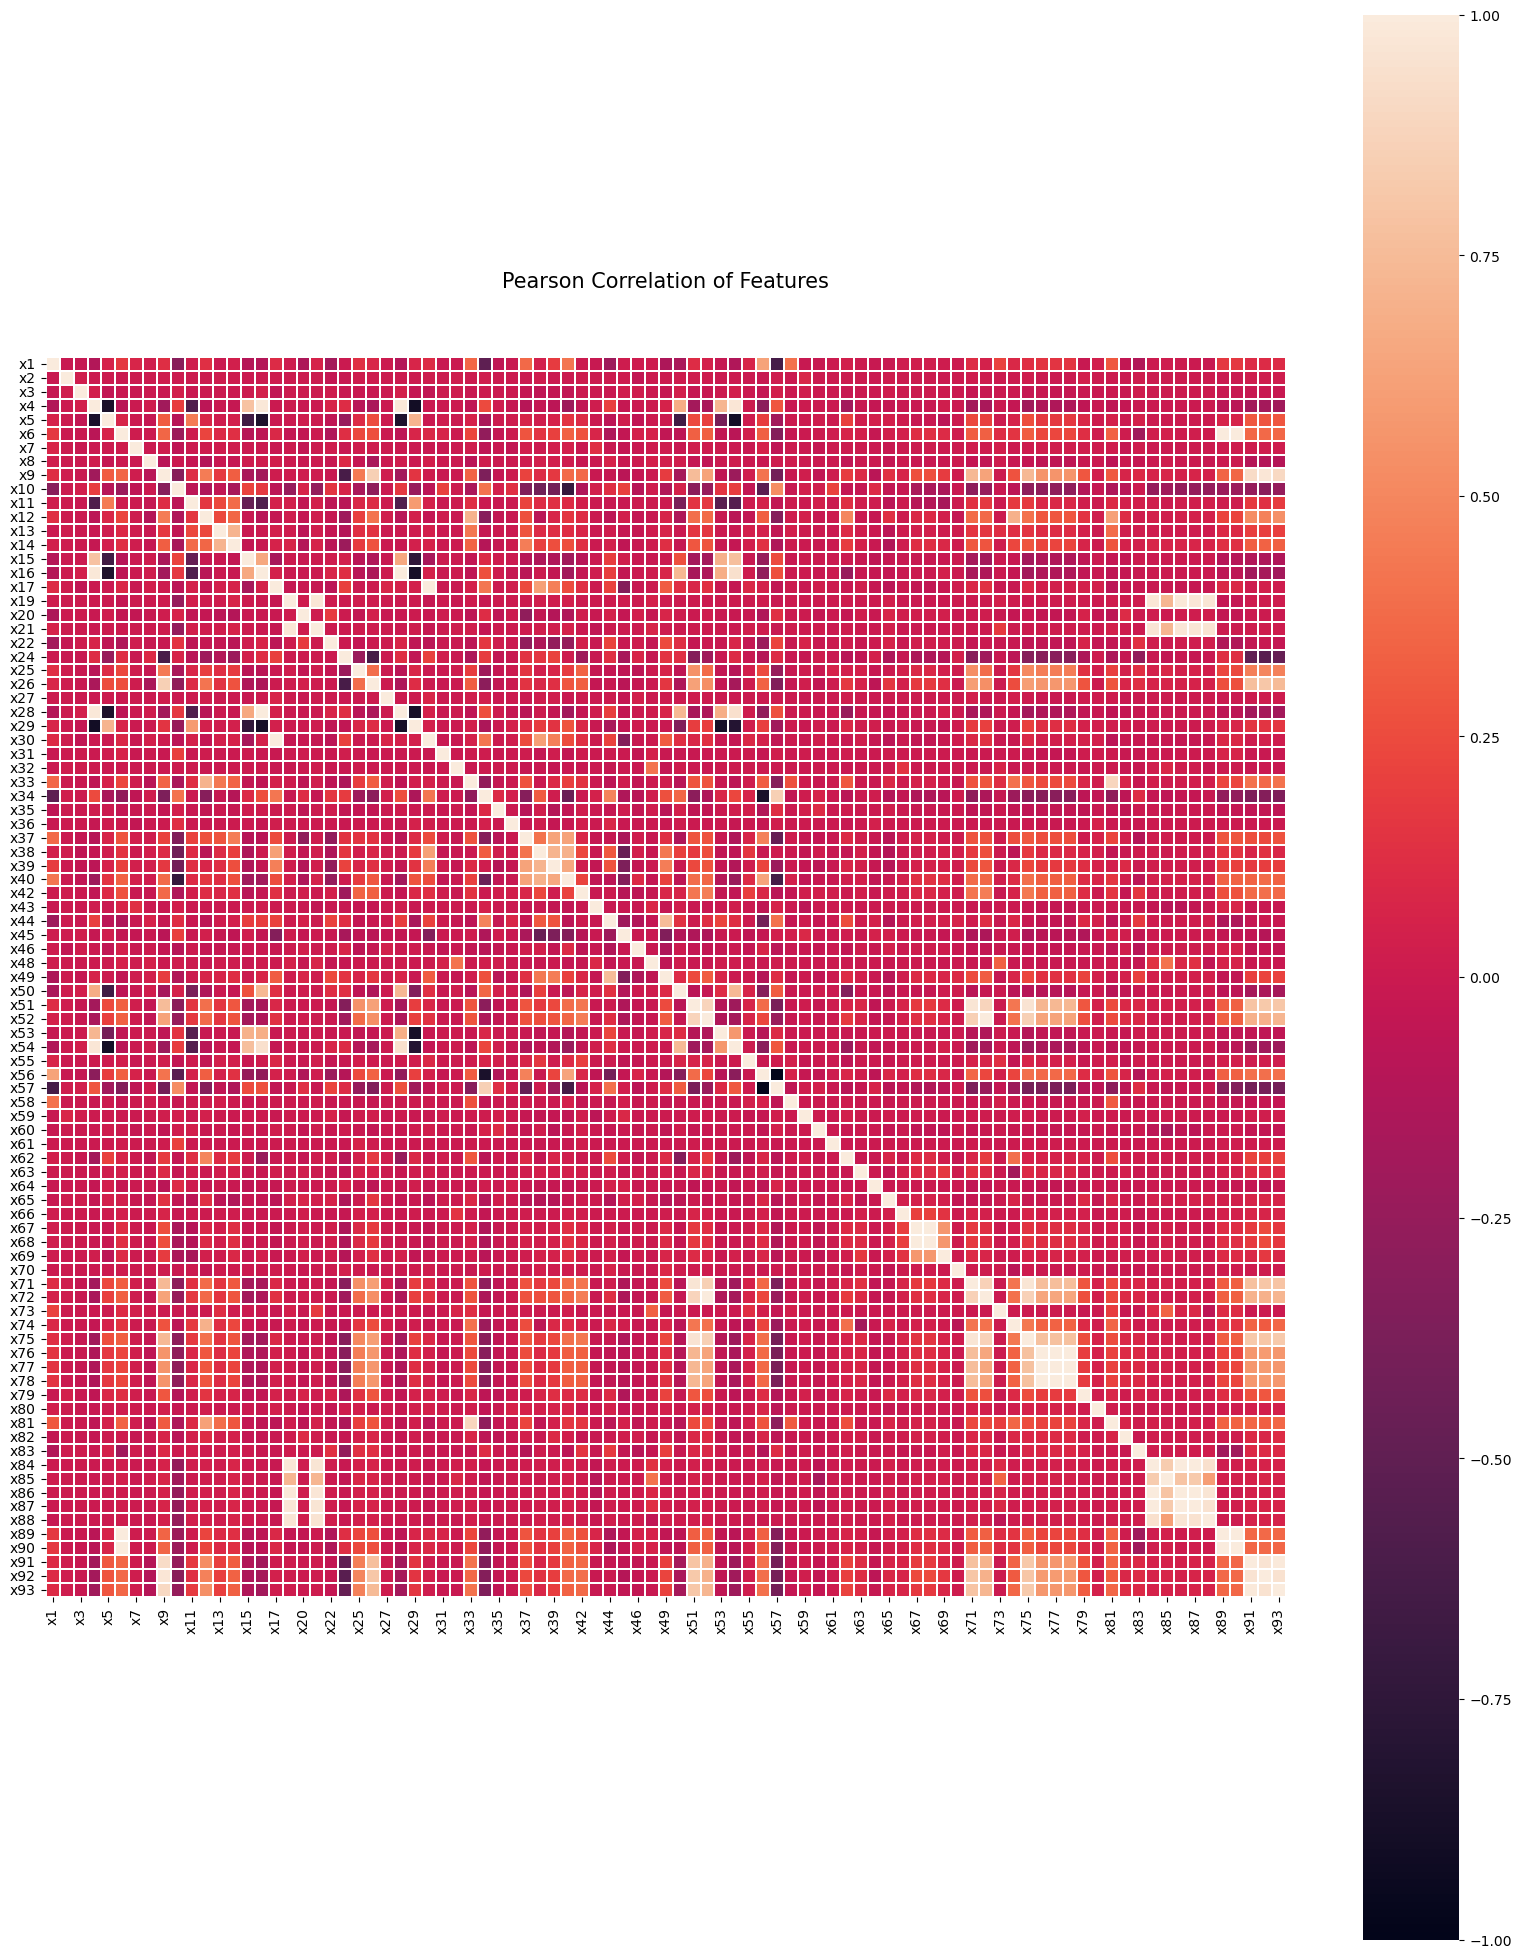

In [14]:
plt.figure(figsize=(20,25))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(train1[features].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white')#,annot=True)
plt.xticks(rotation=90)    # 将字体进行旋转
plt.yticks(rotation=360)
plt.show()

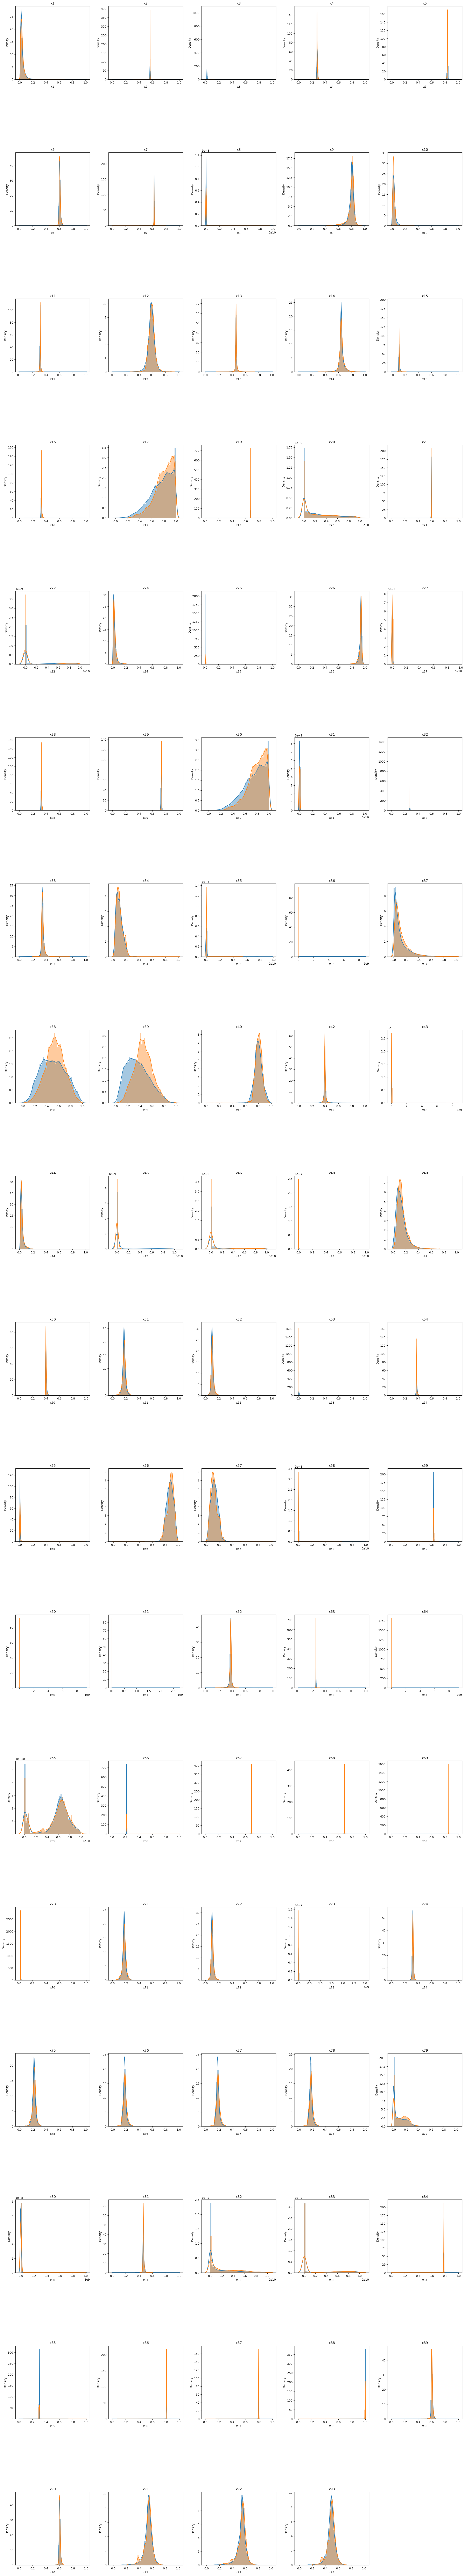

In [15]:
    import warnings
    import seaborn as sns
    warnings.filterwarnings('ignore')
    fig = plt.figure(figsize=(28,180))
    for h, k in enumerate(features):
        #l=len(train_df[train_df['state']==j]['cfips'].unique())//5
        #odd 
        plt.subplot(20, 5, h+1)
        name=k
        #sns.lineplot(data=train_df[train_df['cfips']==k],x='year_month',y='active')
        sns.distplot(train1[k])
        sns.distplot(test[k])
        #sns.lineplot(data=df_train[df_train['cfips']==k],x='year_month',y='microbusiness_density')
        #ax.set(ylabel='active')
        #locs, labels = plt.xticks()
        #plt.setp(labels, rotation=45)

        #ax2 = plt.twinx()
        #ax2 = sns.distplot(y, kde=True, hist=False, ax=ax2)


        
        #sns.lineplot(data=train_df1[train_df1['cfips']==k],x='year_month',y='microbusiness_density',color='orange')
        #ax2.set_ylabel('density')
        #train_df[train_df['cfips']==k][['active','microbusiness_density']].plot(secondary_y='active')
        #plt.axvline("202210",c='grey',linestyle='--')
        #locs, labels = plt.xticks()
        #plt.setp(labels, rotation=45)
        plt.title(k)
    #plt.axis = 'off' #关闭坐标 让图更美观
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=1)
    plt.show()

In [16]:
train1['x64'].value_counts()

0.000468    150.000441    150.000422    140.000465    100.000502    10            ..0.000477     10.000457     10.000406     10.000414     10.000435     1Name: x64, Length: 58440, dtype: int64

In [17]:
for i in ["x1",
"x2",
"x3",
"x4",
"x6",
"x10",
"x11",
"x18",
"x21",
"x24",
"x28",
"x29",
"x33",
"x34",
"x35",
"x36",
"x42",
"x51",
"x52",
"x53",
"x54",
"x58",
"x59",
"x60",
"x61",
"x62",
"x63",
"x64",
"x76",
"x77",
"x78",
"x81",
"x89",
"x90",
"x15","x16",
#"x32","x44"
]:
    a=test[i].max()
    train1[i]=train1[i].apply(lambda x :x if x<=a else a)

In [18]:
for i in["x9",
#"x11",
#"x12",
#"x14",
"x19",
"x21",
"x26",
#"x28",
"x29",
#"x32",
#"x33",
#"x42",
#"x50",
#"x62",
# "x63",
#"x66",
"x67",
"x68",
"x69",
"x81",
"x89",
"x90",
#"x91",
#"x92",
#"x93",
]:
    a=train1[i].min()
    test[i]=test[i].apply(lambda x :x if x>=a else a)   

In [19]:
train=train1.append(test,ignore_index=False)

In [20]:
train

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x85,x86,x87,x88,x89,x90,x91,x92,x93,target
0,0,0.044565,0.565232,0.026807,0.277510,0.841622,0.606100,0.623907,0.006651,0.819966,...,0.303745,0.809452,0.797538,0.998988,0.605957,0.606102,0.559521,0.573769,0.505749,0.0
1,1,0.033669,0.554498,0.026342,0.279219,0.840480,0.603612,0.623799,0.004209,0.800841,...,0.303443,0.809331,0.797389,0.999008,0.603648,0.603615,0.535289,0.542889,0.482052,0.0
2,2,0.025882,0.565383,0.026841,0.281413,0.842148,0.606684,0.624912,0.001448,0.819439,...,0.303508,0.809424,0.797533,0.999097,0.606688,0.606688,0.572793,0.577020,0.527860,0.0
3,3,0.017006,0.564639,0.026708,0.312728,0.838685,0.605290,0.623656,0.000684,0.799552,...,0.303504,0.809318,0.797394,0.998982,0.605293,0.605293,0.532640,0.546951,0.484103,0.0
4,4,0.021400,0.562448,0.026505,0.283815,0.839210,0.610309,0.622768,0.002616,0.789094,...,0.303132,0.809211,0.797265,0.999053,0.610321,0.610308,0.527142,0.525711,0.472661,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,99995,0.025875,0.565348,0.026832,0.280869,0.842559,0.616344,0.623959,0.000125,0.824296,...,0.303520,0.809430,0.797519,0.999079,0.616346,0.616346,0.600193,0.601450,0.549895,NaN
39996,99996,0.043928,0.565112,0.026782,0.277711,0.841294,0.613340,0.623886,0.000690,0.817388,...,0.303702,0.809410,0.797481,0.998960,0.613343,0.613343,0.558343,0.570667,0.499683,NaN
39997,99997,0.015886,0.563840,0.026614,0.293070,0.833864,0.593328,0.621391,0.001353,0.762204,...,0.303452,0.809063,0.797117,0.998777,0.593337,0.593332,0.481961,0.480068,0.431672,NaN
39998,99998,0.022803,0.565055,0.026771,0.286077,0.834606,0.597900,0.623863,0.001629,0.766168,...,0.303439,0.809260,0.797332,0.998962,0.597901,0.597901,0.467390,0.482596,0.420089,NaN


In [21]:
train1

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x85,x86,x87,x88,x89,x90,x91,x92,x93,target
0,0,0.044565,0.565232,0.026807,0.277510,0.841622,0.606100,0.623907,0.006651,0.819966,...,0.303745,0.809452,0.797538,0.998988,0.605957,0.606102,0.559521,0.573769,0.505749,0
1,1,0.033669,0.554498,0.026342,0.279219,0.840480,0.603612,0.623799,0.004209,0.800841,...,0.303443,0.809331,0.797389,0.999008,0.603648,0.603615,0.535289,0.542889,0.482052,0
2,2,0.025882,0.565383,0.026841,0.281413,0.842148,0.606684,0.624912,0.001448,0.819439,...,0.303508,0.809424,0.797533,0.999097,0.606688,0.606688,0.572793,0.577020,0.527860,0
3,3,0.017006,0.564639,0.026708,0.312728,0.838685,0.605290,0.623656,0.000684,0.799552,...,0.303504,0.809318,0.797394,0.998982,0.605293,0.605293,0.532640,0.546951,0.484103,0
4,4,0.021400,0.562448,0.026505,0.283815,0.839210,0.610309,0.622768,0.002616,0.789094,...,0.303132,0.809211,0.797265,0.999053,0.610321,0.610308,0.527142,0.525711,0.472661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,0.102314,0.566328,0.027151,0.279364,0.841161,0.610088,0.622934,0.072789,0.817217,...,0.303529,0.809471,0.797541,0.999093,0.610094,0.610089,0.601242,0.575495,0.538123,0
59996,59996,0.029860,0.565454,0.026862,0.282874,0.843580,0.601806,0.623090,0.008930,0.838433,...,0.303523,0.809419,0.797509,0.999069,0.601721,0.601808,0.607575,0.621555,0.556838,0
59997,59997,0.052078,0.564987,0.026808,0.277030,0.840598,0.611670,0.623754,0.000857,0.805179,...,0.303526,0.809358,0.797452,0.999020,0.611671,0.611671,0.540747,0.549321,0.490580,0
59998,59998,0.030184,0.565577,0.026596,0.279630,0.843191,0.616189,0.623706,0.000872,0.835900,...,0.303553,0.809475,0.797594,0.999126,0.616189,0.616192,0.597242,0.607896,0.551061,0


In [22]:
from sklearn.preprocessing import StandardScaler
import math
scale= StandardScaler()
#features1=[a for a in train1.columns if a not in ['target','preds','id','x17','x20','x18','x22','x23','x24','x30','x41','x45','x46','x47','x65','x73','x79','x80','x82','x83']]
#truncation
#for i in ['x17','x20','x22','x23','x30','x45','x46','x73','x80','x82','x83']:
    #train[i]=train[i].apply(lambda x:math.log1p(x))

train[features]=scale.fit_transform(train[features])
#train[features]=train[features]-train[features].mean()
#train[features]=train[features]/(train[features].max()-train[features].min())
train1=train[~train.T.isnull().any()]
test=train[train.T.isnull().any()]

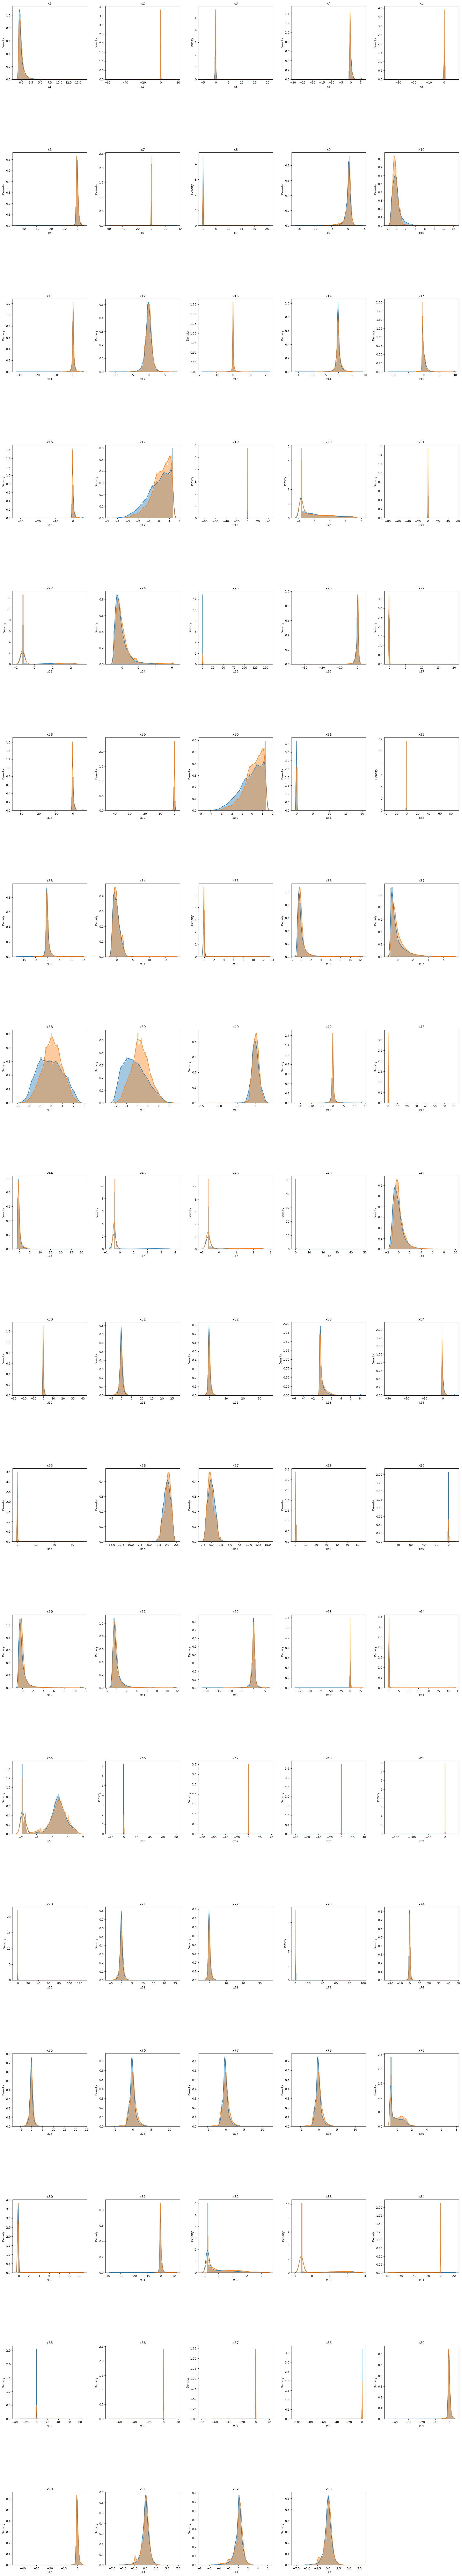

In [23]:
    import warnings
    import seaborn as sns
    warnings.filterwarnings('ignore')
    fig = plt.figure(figsize=(28,180))
    for h, k in enumerate(features):
        #l=len(train_df[train_df['state']==j]['cfips'].unique())//5
        #odd 
        plt.subplot(20, 5, h+1)
        name=k
        #sns.lineplot(data=train_df[train_df['cfips']==k],x='year_month',y='active')
        sns.distplot(train1[k])
        sns.distplot(test[k])
        #sns.lineplot(data=df_train[df_train['cfips']==k],x='year_month',y='microbusiness_density')
        #ax.set(ylabel='active')
        #locs, labels = plt.xticks()
        #plt.setp(labels, rotation=45)

        #ax2 = plt.twinx()
        #ax2 = sns.distplot(y, kde=True, hist=False, ax=ax2)


        
        #sns.lineplot(data=train_df1[train_df1['cfips']==k],x='year_month',y='microbusiness_density',color='orange')
        #ax2.set_ylabel('density')
        #train_df[train_df['cfips']==k][['active','microbusiness_density']].plot(secondary_y='active')
        #plt.axvline("202210",c='grey',linestyle='--')
        #locs, labels = plt.xticks()
        #plt.setp(labels, rotation=45)
        plt.title(k)
    #plt.axis = 'off' #关闭坐标 让图更美观
    plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=1)
    plt.show()

In [24]:
train1

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x85,x86,x87,x88,x89,x90,x91,x92,x93,target
0,0,0.027766,-0.007736,-0.104756,-0.383304,0.144928,-0.048209,0.003525,-0.063342,0.462288,...,0.031224,0.039329,0.040269,0.022462,-0.058385,-0.048162,0.306522,0.418180,0.219978,0.0
1,1,-0.248670,-1.108984,-0.191038,-0.208815,0.095141,-0.231241,-0.006558,-0.063342,0.087824,...,-0.006125,0.028333,0.025506,0.024498,-0.228579,-0.231115,-0.047568,0.008071,-0.142963,0.0
2,2,-0.446236,0.007698,-0.098428,0.015176,0.167884,-0.005259,0.097452,-0.063342,0.451976,...,0.001880,0.036773,0.039759,0.033670,-0.004512,-0.005045,0.500461,0.461362,0.558612,0.0
3,3,-0.671454,-0.068618,-0.123205,3.211891,0.016935,-0.107804,-0.019907,-0.063342,0.062583,...,0.001447,0.027163,0.025927,0.021866,-0.107327,-0.107671,-0.086276,0.062013,-0.111557,0.0
4,4,-0.559974,-0.293347,-0.160896,0.260336,0.039812,0.261415,-0.102883,-0.063342,-0.142169,...,-0.044440,0.017534,0.013247,0.029100,0.263181,0.261260,-0.166615,-0.220072,-0.286796,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,1.492969,0.104704,-0.040861,-0.193968,0.124849,0.245159,-0.087399,-0.063342,0.408479,...,0.004493,0.040980,0.040486,0.033257,0.246492,0.245116,0.916174,0.441102,0.715799,0.0
59996,59996,-0.345309,0.014962,-0.094594,0.164267,0.230299,-0.364025,-0.072773,-0.063342,0.823878,...,0.003742,0.036327,0.037316,0.030812,-0.370562,-0.364027,1.008720,1.052829,1.002442,0.0
59997,59997,0.218395,-0.032942,-0.104530,-0.432290,0.100326,0.361552,-0.010754,-0.063342,0.172776,...,0.004168,0.030819,0.031706,0.025775,0.362671,0.361466,0.032192,0.093485,-0.012359,0.0
59998,59998,-0.337100,0.027590,-0.143846,-0.166901,0.213306,0.694000,-0.015208,-0.063342,0.774289,...,0.007478,0.041361,0.045733,0.036613,0.695681,0.694078,0.857725,0.871423,0.913960,0.0


In [25]:
y=train1.pop('target')
del train1['id']

In [26]:
from catboost import CatBoostClassifier

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

train1['preds'] = 0
scores = defaultdict(list)
features_importance= pd.DataFrame()
df_importance_list = []
for fold, (trn_ind, val_ind) in enumerate(kfold.split(train1, y)):
    print(f"=====================fold: {fold}=====================")
    X_train, y_train = train1.iloc[trn_ind], y.iloc[trn_ind]
    X_valid, y_valid = train1.iloc[val_ind], y.iloc[val_ind]

    #X_train,X_valid=get_c_default_k_fold(X_train,X_valid)
    cb_model = CatBoostClassifier(
        iterations=3000,
                         learning_rate=0.02,
                         depth=9,
                         colsample_bylevel=0.85,
                         subsample=0.8,
                         auto_class_weights='Balanced',#SqrtBalanced'
                         eval_metric='AUC',
                         l2_leaf_reg= 2,
                         random_seed = 24,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         min_data_in_leaf=100,
                         od_wait=100,
                         boosting_type='Ordered',
                                
                                 )
    cb_model.fit(X_train[features], y_train,
         eval_set=[(X_train[features], y_train),(X_valid[features],y_valid)],
         cat_features=[],
         use_best_model=True,
         verbose=True)        
    joblib.dump(cb_model, f'catboost_seed{24}_{fold}.pkl')
    preds = cb_model.predict_proba(X_valid[features])[:,1]
    train1.loc[val_ind, "preds"] = preds

    scores["auc"].append(roc_auc_score(y_valid, preds))
    #scores["pearsonr"].append(pearsonr(y_valid, preds)[0])

    #fold_importance_df= pd.DataFrame({'feature': lgbm_features, 'importance': model.feature_importance(), 'fold': fold})
    #features_importance = pd.concat([features_importance, fold_importance_df], axis=0)
    df_importance = pd.DataFrame({
        'column': features,
        'importance': cb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)
    del cb_model
    gc.collect()
print(f"catboost  {5} folds mean auc: {np.mean(scores['auc'])}")
#train.filter(regex=r"^(?!f_).*").to_csv("preds.csv", index=False)

=====================fold: 0=====================

0:	test: 0.9643660	test1: 0.9651588	best: 0.9651588 (0)	total: 707ms	remaining: 35m 19s75:	test: 0.9968492	test1: 0.9961704	best: 0.9961704 (75)	total: 49.9s	remaining: 32m150:	test: 0.9993320	test1: 0.9989006	best: 0.9989006 (150)	total: 1m 38s	remaining: 30m 54s225:	test: 0.9998360	test1: 0.9996322	best: 0.9996322 (225)	total: 2m 26s	remaining: 30m 3s300:	test: 0.9999632	test1: 0.9998781	best: 0.9998781 (300)	total: 3m 15s	remaining: 29m 9s375:	test: 0.9999869	test1: 0.9999426	best: 0.9999426 (375)	total: 4m 3s	remaining: 28m 18s450:	test: 0.9999969	test1: 0.9999757	best: 0.9999757 (450)	total: 4m 51s	remaining: 27m 27s525:	test: 0.9999991	test1: 0.9999871	best: 0.9999871 (524)	total: 5m 39s	remaining: 26m 38s600:	test: 0.9999998	test1: 0.9999923	best: 0.9999924 (598)	total: 6m 27s	remaining: 25m 47s675:	test: 0.9999999	test1: 0.9999949	best: 0.9999949 (675)	total: 7m 15s	remaining: 24m 58s750:	test: 1.0000000	test1: 0.9999960	best: 0.9999960 (743)	total: 8m 3s	remaining: 24m 8s825:	

0:	test: 0.9648406	test1: 0.9633485	best: 0.9633485 (0)	total: 617ms	remaining: 30m 49s75:	test: 0.9963670	test1: 0.9956525	best: 0.9956525 (75)	total: 49.8s	remaining: 31m 55s150:	test: 0.9992273	test1: 0.9987856	best: 0.9987856 (150)	total: 1m 38s	remaining: 30m 56s225:	test: 0.9997898	test1: 0.9994762	best: 0.9994762 (225)	total: 2m 26s	remaining: 30m 3s300:	test: 0.9999512	test1: 0.9998249	best: 0.9998249 (300)	total: 3m 16s	remaining: 29m 17s375:	test: 0.9999878	test1: 0.9999226	best: 0.9999226 (375)	total: 4m 4s	remaining: 28m 25s450:	test: 0.9999964	test1: 0.9999619	best: 0.9999619 (450)	total: 4m 53s	remaining: 27m 37s525:	test: 0.9999992	test1: 0.9999732	best: 0.9999732 (525)	total: 5m 40s	remaining: 26m 42s600:	test: 0.9999997	test1: 0.9999807	best: 0.9999809 (596)	total: 6m 27s	remaining: 25m 47s675:	test: 0.9999999	test1: 0.9999842	best: 0.9999842 (672)	total: 7m 14s	remaining: 24m 54s750:	test: 1.0000000	test1: 0.9999864	best: 0.9999864 (750)	total: 8m 1s	remaining: 24m 3s

0:	test: 0.9663896	test1: 0.9665864	best: 0.9665864 (0)	total: 615ms	remaining: 30m 43s75:	test: 0.9967069	test1: 0.9961438	best: 0.9961438 (75)	total: 48.5s	remaining: 31m 7s150:	test: 0.9993508	test1: 0.9989693	best: 0.9989693 (150)	total: 1m 35s	remaining: 30m 6s225:	test: 0.9998635	test1: 0.9996529	best: 0.9996529 (225)	total: 2m 23s	remaining: 29m 19s300:	test: 0.9999650	test1: 0.9998290	best: 0.9998290 (300)	total: 3m 10s	remaining: 28m 30s375:	test: 0.9999888	test1: 0.9999029	best: 0.9999029 (374)	total: 3m 58s	remaining: 27m 43s450:	test: 0.9999955	test1: 0.9999450	best: 0.9999450 (448)	total: 4m 45s	remaining: 26m 55s525:	test: 0.9999987	test1: 0.9999673	best: 0.9999673 (525)	total: 5m 33s	remaining: 26m 6s600:	test: 0.9999995	test1: 0.9999776	best: 0.9999776 (600)	total: 6m 20s	remaining: 25m 18s675:	test: 0.9999997	test1: 0.9999841	best: 0.9999841 (673)	total: 7m 8s	remaining: 24m 32s750:	test: 0.9999998	test1: 0.9999900	best: 0.9999900 (750)	total: 7m 55s	remaining: 23m 43s

0:	test: 0.9644503	test1: 0.9592857	best: 0.9592857 (0)	total: 627ms	remaining: 31m 21s75:	test: 0.9966612	test1: 0.9959462	best: 0.9959462 (75)	total: 50.4s	remaining: 32m 17s150:	test: 0.9992769	test1: 0.9988988	best: 0.9988988 (150)	total: 1m 38s	remaining: 31m 2s225:	test: 0.9998447	test1: 0.9996431	best: 0.9996431 (225)	total: 2m 27s	remaining: 30m 11s300:	test: 0.9999615	test1: 0.9998779	best: 0.9998779 (300)	total: 3m 16s	remaining: 29m 20s375:	test: 0.9999891	test1: 0.9999480	best: 0.9999480 (375)	total: 4m 4s	remaining: 28m 26s450:	test: 0.9999975	test1: 0.9999836	best: 0.9999836 (450)	total: 4m 53s	remaining: 27m 37s525:	test: 0.9999992	test1: 0.9999926	best: 0.9999926 (525)	total: 5m 41s	remaining: 26m 45s600:	test: 0.9999998	test1: 0.9999966	best: 0.9999966 (597)	total: 6m 29s	remaining: 25m 54s675:	test: 0.9999999	test1: 0.9999980	best: 0.9999980 (673)	total: 7m 17s	remaining: 25m 3s750:	test: 0.9999999	test1: 0.9999985	best: 0.9999985 (744)	total: 8m 6s	remaining: 24m 15s

0:	test: 0.9672567	test1: 0.9646901	best: 0.9646901 (0)	total: 623ms	remaining: 31m 7s75:	test: 0.9967142	test1: 0.9955353	best: 0.9955353 (75)	total: 49.5s	remaining: 31m 42s150:	test: 0.9992492	test1: 0.9986977	best: 0.9986977 (150)	total: 1m 38s	remaining: 30m 50s225:	test: 0.9998486	test1: 0.9996130	best: 0.9996130 (225)	total: 2m 26s	remaining: 29m 56s300:	test: 0.9999640	test1: 0.9998675	best: 0.9998675 (300)	total: 3m 14s	remaining: 29m 6s375:	test: 0.9999885	test1: 0.9999428	best: 0.9999429 (374)	total: 4m 2s	remaining: 28m 13s450:	test: 0.9999967	test1: 0.9999798	best: 0.9999798 (450)	total: 4m 51s	remaining: 27m 24s525:	test: 0.9999987	test1: 0.9999895	best: 0.9999896 (523)	total: 5m 38s	remaining: 26m 33s600:	test: 0.9999992	test1: 0.9999942	best: 0.9999942 (600)	total: 6m 26s	remaining: 25m 43s675:	test: 0.9999996	test1: 0.9999955	best: 0.9999956 (669)	total: 7m 14s	remaining: 24m 53s750:	test: 0.9999998	test1: 0.9999967	best: 0.9999967 (743)	total: 8m 2s	remaining: 24m 4s8

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df_importance = pd.concat(df_importance_list) 
df_importance = df_importance.groupby(['column'])['importance'].agg( 'mean').sort_values(ascending=False).reset_index() 
df_importance

,column,importance
0,x20,6.395673
1,x82,5.034605
2,x54,3.834874
3,x22,3.516114
4,x65,3.118439
...,...,...
84,x80,0.052015
85,x48,0.023282
86,x27,0.009173
87,x8,0.007561


<Axes: xlabel='importance', ylabel='column'>

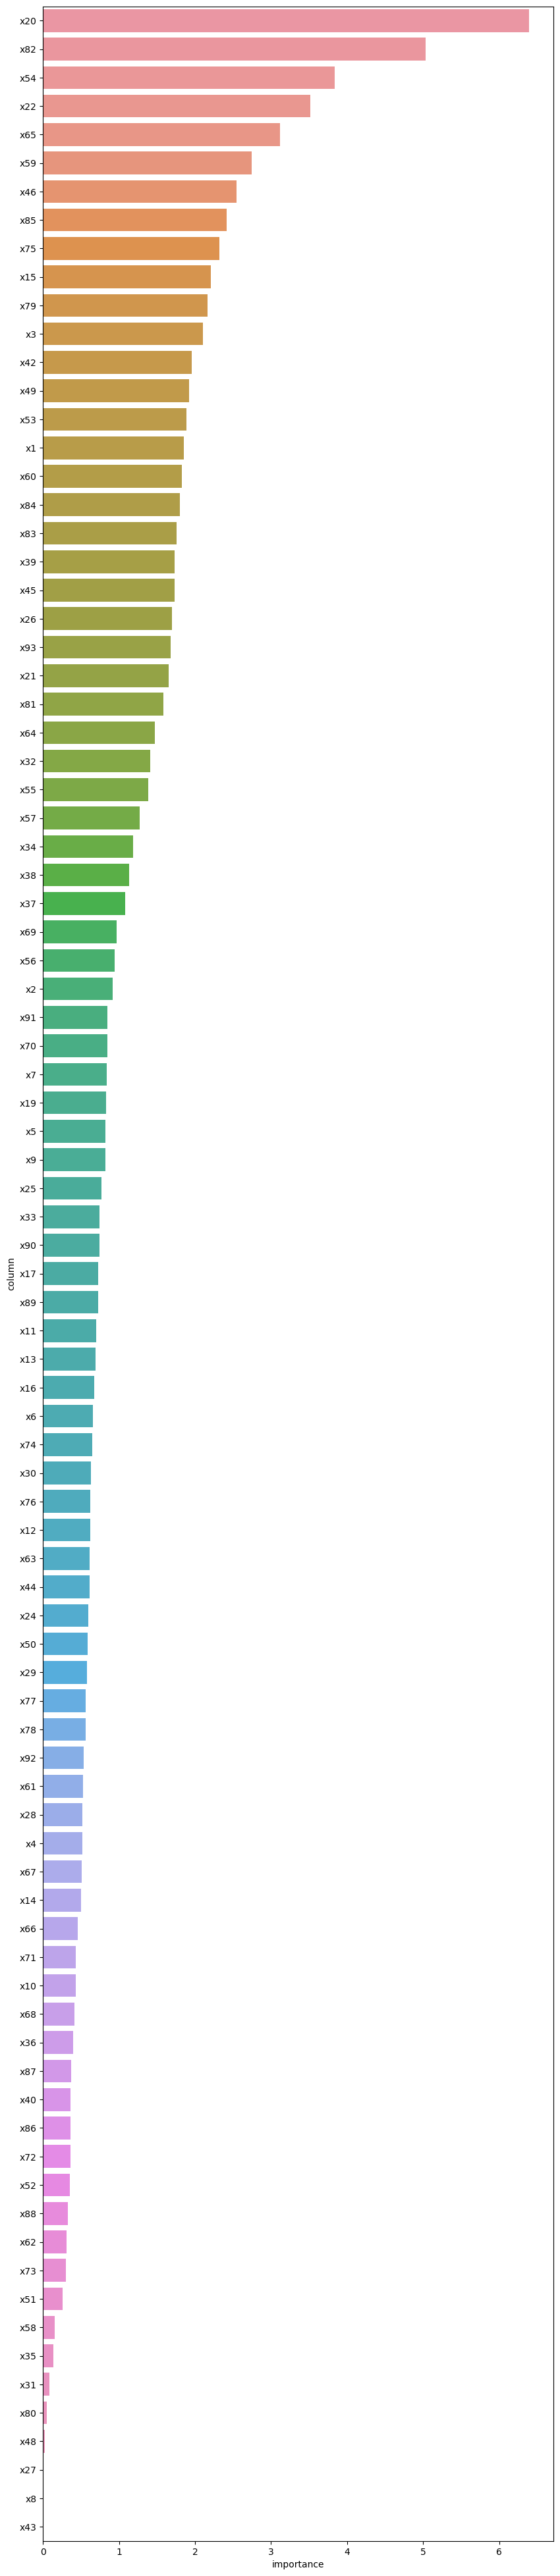

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 
fig, ax = plt.subplots(1, 1, figsize=(10, 50)) 
sns.barplot(x='importance', y='column', data=df_importance, ax=ax)

In [30]:
models = [joblib.load(f'catboost_seed{24}_{fold}.pkl') for fold in range(5)]
#models = [joblib.load(f'catboost_seed{24}_{fold}.pkl') for fold in range(5)]


#test_df=df_data[df_data['year']==2020]
#df_data,test_df=get_c_default_k_fold(df_data,test_df)

final_pred = [models[fold].predict_proba(test[features])[:,1] for fold in range(5)]
                                                                         
test['target'] = np.mean(np.stack(final_pred), axis=0)
#test_df.drop_duplicates(subset=['ent_id'],keep='first',inplace=True)
#test_df.shape

#submission=test_data.merge(test_df, on='ent_id', how='left')
#submission=submission[['ent_id','default_score']]
#print(submission.shape)
#submission=submission.set_index('ent_id')

#len(test_df.ent_id.unique())
test['target']=test['target'].round(3)
test.to_csv('submit.csv')

In [31]:
test[['id','target']].to_csv('submit1.csv')

In [32]:
test[['id','target']]

,id,target
0,60000,0.996
1,60001,0.000
2,60002,0.000
3,60003,0.000
4,60004,0.010
...,...,...
39995,99995,0.000
39996,99996,0.000
39997,99997,0.890
39998,99998,0.031
